In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pathlib
pathlib.Path().resolve()

In [13]:
# Set the directory where the xvg files are located
rootdir = pwd

# Create an empty list to hold the dataframes
dfs = []
names =[]
source = input("Input the full xvg file (eg: rmsd_p100.xvg): ")

# Loop through all the subfolders and find the xvg files
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(source):
            filepath = os.path.join(subdir, file)
            # Read the xvg file into a pandas dataframe
            name=os.path.basename(subdir)
            df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=18, names=['time',name])
            # Add a column to the dataframe with the name of the subfolder
            if len(dfs)==0:
                dfs.append(df['time'])
            names.append(name)
            dfs.append(df[name])

# Concatenate all the dataframes in the list into one
df=pd.DataFrame(dfs)
df=df.T


NameError: name 'pwd' is not defined

In [12]:
# Use seaborn to plot the data
print(df.head)
print(df.columns)
df.to_csv(source.replace('xvg','csv'))
df.time=df.time/1000

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>
Index([], dtype='object')


AttributeError: 'DataFrame' object has no attribute 'time'

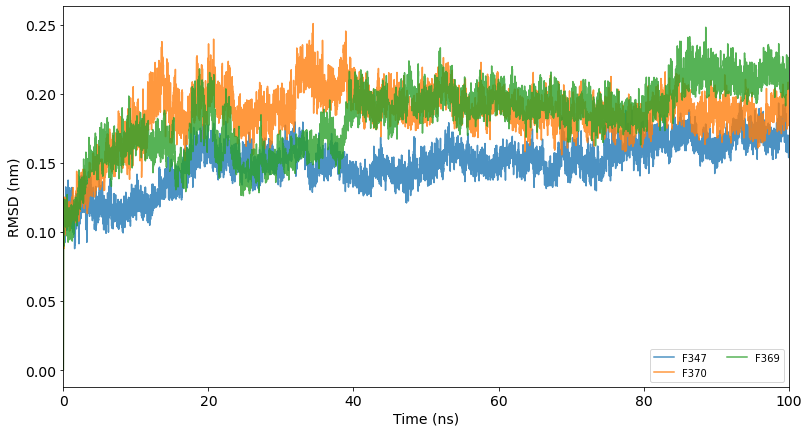

In [10]:
df.plot(x='time',figsize=(13,7),alpha=0.8)
plt.legend(fontsize='large')
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('RMSD (nm)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,100)
plt.legend(ncol=2, loc="lower right")
plt.show()
